<a href="https://colab.research.google.com/github/Abhi08ch/CodVeda-Technologies/blob/main/L3_Task_3_Neural_Networks_for_Classification_using_TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEVEL-3**

# **Task 3: Neural Networks for Classification using TensorFlow/Keras**

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Step 2: Load and Preprocess the Data
# Load dataset
df = pd.read_csv("/content/churn-bigml-80.csv")

# Convert target column to numeric
df['Churn'] = df['Churn'].astype(int)

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Split features and labels
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Step 3: Build Neural Network
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Step 4: Train the Model
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9168 - loss: 0.2177 - val_accuracy: 0.8454 - val_loss: 0.3807
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9167 - loss: 0.2177 - val_accuracy: 0.8548 - val_loss: 0.3754
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9263 - loss: 0.1953 - val_accuracy: 0.8501 - val_loss: 0.3856
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9444 - loss: 0.1720 - val_accuracy: 0.8595 - val_loss: 0.3855
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9448 - loss: 0.1562 - val_accuracy: 0.8595 - val_loss: 0.3874
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9610 - loss: 0.1327 - val_accuracy: 0.8618 - val_loss: 0.3931
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9623 - loss: 0.1229 - val_accuracy: 0.8618 - val_loss: 0.3976


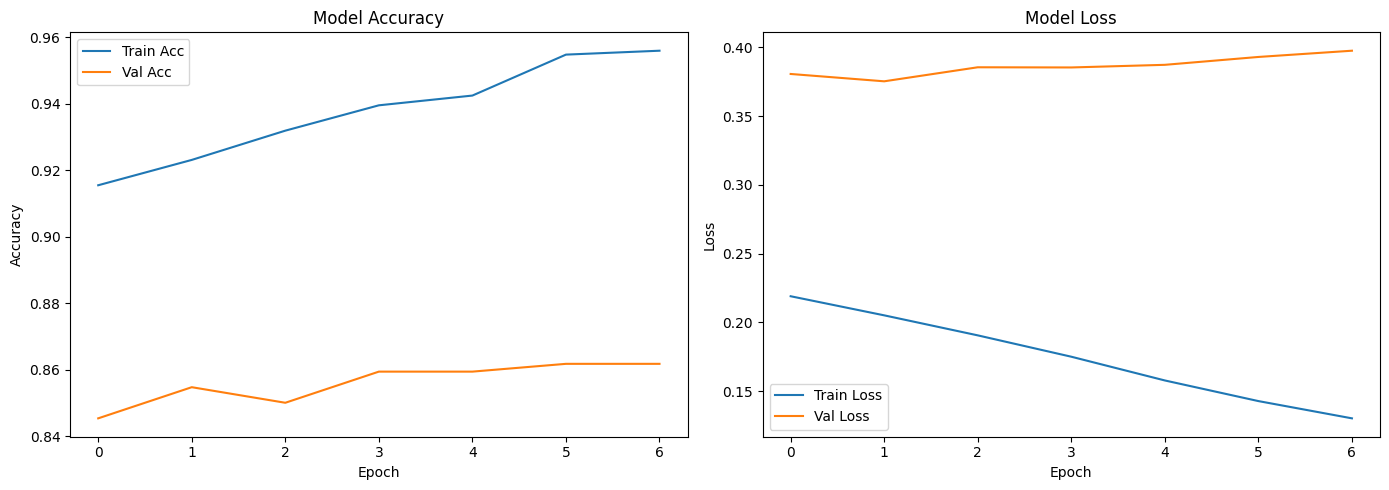

In [8]:
# Step 5: Visualize Training Progress
# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# Step 6: Evaluate on Test Set
# Evaluate
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       456
           1       0.49      0.41      0.45        78

    accuracy                           0.85       534
   macro avg       0.70      0.67      0.68       534
weighted avg       0.84      0.85      0.85       534

Confusion Matrix:
 [[423  33]
 [ 46  32]]
